In [1]:
%matplotlib inline
from __future__  import print_function, division
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('311_Service_Requests_2016.csv', dtype={'Incident Zip':'str'})

In [3]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [4]:
df.drop(['Closed Date', 'Agency', 'Agency Name', 'Complaint Type', 'Descriptor',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board','X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'], axis=1, inplace=True)

In [5]:
df.head()

,Unique Key,Created Date,Location Type,Incident Zip,Borough,Latitude,Longitude,Location
0,32310161,01/01/2016 12:00:00 AM,Vacant Lot,10473,BRONX,40.806742,-73.857150,"(40.80674160706358, -73.85715046762321)"
1,32310287,01/01/2016 12:00:00 AM,Other (Explain Below),10468,BRONX,40.858406,-73.899386,"(40.85840604170503, -73.89938613893433)"
2,32310788,01/01/2016 12:00:00 AM,3+ Family Apt. Building,10029,MANHATTAN,40.794120,-73.939579,"(40.79411991259857, -73.93957875121706)"
3,32310789,01/01/2016 12:00:00 AM,3+ Family Apt. Building,11432,QUEENS,40.709824,-73.804555,"(40.709824136558204, -73.80455543495027)"
4,32310790,01/01/2016 12:00:00 AM,3+ Family Apt. Building,11210,BROOKLYN,40.611521,-73.950394,"(40.61152137455337, -73.95039416824221)"


In [6]:
print(df.shape)

(31439, 8)


In [7]:
rodentCount = df.groupby(df['Incident Zip'], as_index=False).count()
rodentCount.head(10)

,Incident Zip,Unique Key,Created Date,Location Type,Borough,Latitude,Longitude,Location
0,00083,11,11,11,11,11,11,11
1,10000,1,1,1,1,1,1,1
2,10001,121,121,121,121,117,117,117
3,10002,332,332,332,332,329,329,329
4,10003,223,223,223,223,219,219,219
5,10004,11,11,11,11,11,11,11
6,10005,10,10,10,10,10,10,10
7,10006,8,8,8,8,8,8,8
8,10007,22,22,22,22,22,22,22
9,10009,230,230,230,230,222,222,222


In [8]:
type(rodentCount)

pandas.core.frame.DataFrame

In [9]:
# output the data by zip code for map plotting
rodentCount.to_csv('rodentbyZip.csv')

In [10]:
dfBusi = pd.read_csv('Legally_Operating_Businesses.csv', encoding = "ISO-8859-1", dtype={'Incident Zip':'str'})

In [11]:
dfBusi.head()

,DCA License Number,License Type,License Expiration Date,License Category,Business Name,Business Name 2,Address Building,Address Street Name,Secondary Address Street Name,Address City,Address State,Address ZIP,Contact Phone Number,Address Borough,Detail,Longitude,Latitude
0,2045982-DCA,Business,3/31/18,Horse Drawn Cab Owner,CENTRAL PARK HORSE DRAWN CARRIAGE INC,NaN,580,84TH ST,NaN,BROOKLYN,NY,11209,9175355100,Brooklyn,Plate Number: 1145,-74.023645,40.621823
1,2021527-2-DCA,Business,12/31/18,Cigarette Retail Dealer,CROES GROCERY DELI CORP,NaN,1701,E 174TH ST,NaN,BRONX,NY,10472,NaN,Bronx,NaN,-73.871687,40.834552
2,2053783-DCA,Individual,2/28/18,Process Server Individual,"ASKAR, EL-BARAA",NaN,1900,51ST ST,NaN,BROOKLYN,NY,11204,7189217014,NaN,NaN,NaN,NaN
3,1464636-DCA,Individual,5/31/18,Horse Drawn Driver,"SCHWEIKER, JAMES",NaN,206,EHRHARDT RD,NaN,PEARL RIVER,NY,10965,8457350784,NaN,NaN,NaN,NaN
4,2039354-DCA,Business,3/31/18,Stoop Line Stand,FRESH FOOD DELI & GROCERY CORP,NaN,386,CANAL ST,NaN,NEW YORK,NY,10013,3478669640,Manhattan,"Product Category: Fruits, Vegetables, Soft Dri...",-74.004733,40.721405


In [12]:
dfBusi.columns

Index(['DCA License Number', 'License Type', 'License Expiration Date',
       'License Category', 'Business Name', 'Business Name 2',
       'Address Building', 'Address Street Name',
       'Secondary Address Street Name', 'Address City', 'Address State',
       'Address ZIP', 'Contact Phone Number', 'Address Borough', 'Detail',
       'Longitude', 'Latitude'],
      dtype='object')

In [13]:
dfBusi.drop(['License Expiration Date', 'Secondary Address Street Name',
       'License Category', 'Business Name', 'Business Name 2',
       'Address Building', 'Address Street Name', 'Address City',
       'Address State', 'Address Borough', 'Longitude',
       'Latitude', 'Contact Phone Number', 'Detail'], axis=1, inplace=True)

In [14]:
dfBusi.head(10)

,DCA License Number,License Type,Address ZIP
0,2045982-DCA,Business,11209
1,2021527-2-DCA,Business,10472
2,2053783-DCA,Individual,11204
3,1464636-DCA,Individual,10965
4,2039354-DCA,Business,10013
5,2029847-DCA,Individual,10036
6,2012456-1-DCA,Business,11355
7,1263165-DCA,Business,10308
8,1475158-DCA,Business,11354
9,0841498-DCA,Individual,11793


In [15]:
busiCount = dfBusi.groupby(dfBusi['Address ZIP'], as_index=False).count()
busiCount.head(10)

,Address ZIP,DCA License Number,License Type
0,10001,588,588
1,10002,521,521
2,10003,510,510
3,10004,89,89
4,10005,69,69
5,10006,37,37
6,10007,131,131
7,10008,1,1
8,10009,275,275
9,10010,298,298


In [16]:
busiCount.rename(columns = { 'Address ZIP' : 'Incident Zip'}, inplace=True)

In [17]:
dfMerg = pd.merge(rodentCount, busiCount, on='Incident Zip', how='inner')

In [18]:
dfMerg.head()

,Incident Zip,Unique Key,Created Date,Location Type,Borough,Latitude,Longitude,Location,DCA License Number,License Type
0,10001,121,121,121,121,117,117,117,588,588
1,10002,332,332,332,332,329,329,329,521,521
2,10003,223,223,223,223,219,219,219,510,510
3,10004,11,11,11,11,11,11,11,89,89
4,10005,10,10,10,10,10,10,10,69,69


In [19]:
dfMerg.drop(['Created Date', 'Location Type',
       'Borough', 'License Type', 'Latitude', 'Longitude', 'Location'], axis=1, inplace=True)

In [20]:
dfMerg.rename(columns = { 'Incident Zip': 'Zip Code', 'Unique Key': 'Counts_of_Rodent_Complain',
                        'DCA License Number': 'Number_of_business'}, inplace=True)

In [21]:
dfMerg.head()

,Zip Code,Counts_of_Rodent_Complain,Number_of_business
0,10001,121,588
1,10002,332,521
2,10003,223,510
3,10004,11,89
4,10005,10,69


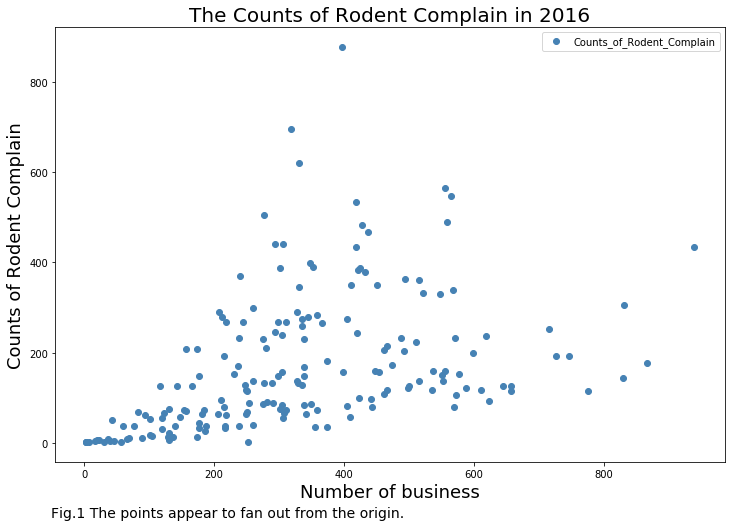

In [22]:
fig = plt.figure(figsize=(12,8))
plt.plot(dfMerg['Number_of_business'], dfMerg['Counts_of_Rodent_Complain'], 'o', color='SteelBlue')
plt.title('The Counts of Rodent Complain in 2016', fontsize = 20)
plt.xlabel('Number of business', fontsize = 18)
plt.ylabel('Counts of Rodent Complain', fontsize = 18)
fig.text(.12, .03, "Fig.1 The points appear to fan out from the origin.", fontsize = 14)
plt.legend()

In [23]:
lm = smf.ols('Counts_of_Rodent_Complain~Number_of_business', data=dfMerg).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Counts_of_Rodent_Complain   R-squared:                       0.180
Model:                                   OLS   Adj. R-squared:                  0.176
Method:                        Least Squares   F-statistic:                     39.96
Date:                       Sun, 08 Oct 2017   Prob (F-statistic):           1.95e-09
Time:                               02:49:38   Log-Likelihood:                -1166.0
No. Observations:                        184   AIC:                             2336.
Df Residuals:                            182   BIC:                             2342.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.4568     20.137      3.002      0.003      20.725     100.188
Number_of_business     0.3352      0.053      6.321      0.000       0.231       0.440
==============================================================================
Omnibus:                       73.811   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.078
Skew:                           1.705   Prob(JB):                     2.41e-46
Kurtosis:                       6.972   Cond. No.                         755.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
log_NoB = np.log(dfMerg['Number_of_business'])
log_CoRC = np.log(dfMerg['Counts_of_Rodent_Complain'])
datalog = pd.DataFrame(data=[log_NoB, log_CoRC]).T
datalog.reset_index(inplace=True, drop=True) #reseting index 
datalog.rename(columns = { 'Number_of_business' : 'log_NoB',
                          'Counts_of_Rodent_Complain' : 'log_CoRC'}, inplace=True)
datalog.head()

,log_NoB,log_CoRC
0,6.376727,4.795791
1,6.255750,5.805135
2,6.234411,5.407172
3,4.488636,2.397895
4,4.234107,2.302585


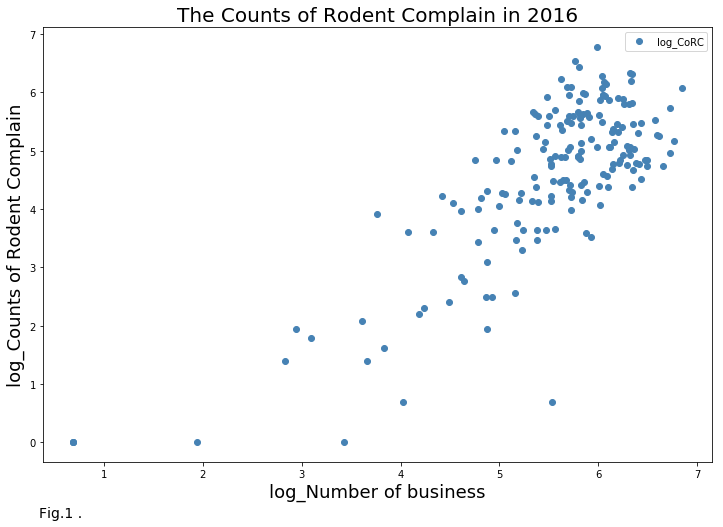

In [26]:
fig = plt.figure(figsize=(12,8))
plt.plot(datalog['log_NoB'], datalog['log_CoRC'], 'o', color='SteelBlue')
plt.title('The Counts of Rodent Complain in 2016', fontsize = 20)
plt.xlabel('log_Number of business', fontsize = 18)
plt.ylabel('log_Counts of Rodent Complain', fontsize = 18)
fig.text(.12, .03, "Fig.1 .", fontsize = 14)
plt.legend()

In [28]:
lm = smf.ols('log_NoB~log_CoRC', data=datalog).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_NoB   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 08 Oct 2017   Prob (F-statistic):           4.48e-41
Time:                        02:51:54   Log-Likelihood:                -169.63
No. Observations:                 184   AIC:                             343.3
Df Residuals:                     182   BIC:                             349.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8872      0.156     18.553      0.000       2.580       3.194
log_CoRC       0.5737      0.033     17.577      0.000       0.509       0.638
==============================================================================
Omnibus:                       18.601   Durbin-Watson:                   1.503
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.748
Skew:                          -0.486   Prob(JB):                     1.73e-08
Kurtosis:                       4.928   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""